# A Very, Very Brief Introduction to Data Visualization (Part I)

# About Me
<br>
<div style="font-size: larger;">
Chandrasekhar (Sekhar) Ramakrishnan<br>
<a href="https://twitter.com/ciyer">@ciyer</a><br>
<br>
<a href="https://datascience.ch">Swiss Data Science Center</a> and freelance data scientist; teach data viz at <a href="https://propulsion.academy">Propulsion Academy</a>

<a href="https://illposed.com"><img alt="illposed logo" src="images/illposed-logo.svg" height="75%"/></a>
</div>

# The Goal of Data Visualization

## The goal of visualizing data is to enable quantitative reasoning with your eyes

There are many valid answers to this question. One of them is the above. It is not the only answer, but it is the answer we will pursue here.

## One data set, two goals

<table>
    <tbody>
        <tr>
            <td><img width="505px" alt="GQ Waistline Viz" src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2010/09/waistline-measurement-chart-for-men.jpg?w=614&ssl=1"></td>
            <td><img width="550px" alt="FD Waistline Viz" src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2010/10/Pants-Size-Chart.png?w=550&ssl=1"></td>
        </tr>
    </tbody>
</table>

From FlowingData https://flowingdata.com/2010/09/30/advertised-vs-actual-waistline/

Consider these two visualizations of the same data set. They are both good, but they look very different because they pursue different goals. 

The one on the right is a visualization of the kind we will be talking about: one designed to enable quantitative reasoning. The one on the left has a different goal: its goal is to be entertaining. This is of course fine, and this visualization does a good job of realizing this goal, but it is not the kind of visualization we will be talking about.

# TLDR

* With the right approach, it is possible to design a visualization that is good for any comparison you want to make
* Without support, color is easy to mess up; but with good tools, color is easy to get right
* Transforming data can be key in visualizing it effectively

We are going to explore how to create visualizations to realize our goal. We will develop a framework for thinking about visualizations that will make it possible to design a visualization that is good for any kind of comparison we want to make. Along the way, we will take a look at two aspects that are important for making readable visualizations: color and data transformation.

# Table of Contents

* Tools for making visualizations
* Thinking about visualizations
* Scales of measurement
* Selecting mappings
* Working with color
* Transformations make visualizations readable

(Pt 2. covers multi-dimensional data, layering, context, small multiples/faceting)

This introduction to data visualization is made up of several sections. To make visualizations, we need to use tools, and we will start by surveying what is out there. Then we will develop some concepts and terminology to think about visualizations. From there we will look at how to make choices to realize effective visualizations, with a bit of extra attention devoted to choosing colors and also transforming data.

# References

<div style="display: flex; flex-direction: row;  justify-content: space-around">

<div>

<h2>Edward Tufte</h2>
<ul>
<li><a href="https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142/">Visual Display of Quantitative Information</a></li>
<li><a href="https://www.amazon.com/Envisioning-Information-Edward-R-Tufte/dp/0961392118/">Envisioning Information</a></li>
<li><a href="https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126/">Visual Explanations</a></li>
</ul>

</div>

<div>

<h2>Online</h2>
<ul>
<li><a href="https://magrawala.github.io/cs448b-fa17/">Maneesh Agrawala’s Visualization Course</a></li>
<li><a href="https://courses.cs.washington.edu/courses/cse442/17au/">Jeffrey Heer’s Visualization Course</a></li>
<li><a href="https://www.tableau.com/sites/default/files/media/designing-great-visualizations.pdf">Jock Mackinlay’s Designing Great Visualizations</a></li>
</ul>

</div>
</div>



<!-- * Müller-Brockmann -->

These materials here borrow extensively from others. The classic trilogy by Edward Tufte is full of wonderful insight and inspiration for making powerful visualizations. And from the academic domain, Maneesh Agrawala, Jeff Heer, and Jock Mackinlay are all computer scientists who specialize in data visualization and make some great resources available online.

# Tools for Visualization

There are many tools out there for making visualizations. You may already be very familiar with one or more. In this presentation, we will not go into any of them in detail, but you may be interested to know what is out there.

## Point & Click

* Excel / Numbers / etc.
* [Tableau](https://www.tableau.com)
* [Spotfire](https://www.tibco.com/products/tibco-spotfire)
* [Power BI](https://powerbi.microsoft.com/en-us/)

Widely used spreadsheet software, like Excel, offer tools for making visualizations from tables of data. These have limited flexibility, but are very easy to use.

Tableau, Spotfire, and Power BI are all GUI-driven tools specifically for data visualization.

<div style="display: flex; flex-direction: row;  justify-content: space-around">

<div style="width: 300px">
<h2>R</h2>
<ul>
<li>ggplot</li>
</ul>
</div>

<div style="width: 430px">
<h2>Python</h2>
<ul>
<li>matplotlib</li>
<li>seaborn</li>
<li>bokeh</li>
<li>altair</li>
<li>HoloViews</li>
</ul>
</div>

<div style="width: 430px">
<h2>JavaScript</h2>
<ul>
<li><strong><a href="https://vega.github.io/vega/">Vega</a> / <a href="https://vega.github.io/vega-lite/">Vega-Lite</a></strong></li>
<li><a href="https://d3js.org">D3</a></li>
<li><a href="https://c3js.org">C3</a></li>
<li><a href="https://plot.ly">plot.ly</a></li>
</ul>
</div>
</div>

Programming languages also provide frameworks for data visualization, including, of course, widely used languages for data analysis like R and Python. The landscape in R is cleaner, in Python there has been much recent activity to develop modern, web-friendly alternatives to the classic matplotlib.

And JavaScript, though not typically an an environment for data analysis, is the primary programming language for the web and has powerful frameworks for visualizing data.

I am not going to say much about all of these in detail, but I wanted to highlight Vega and Vega-Lite, which are declarative specifications for describing data visualizations.

# Thinking About Visualizations

Now we come to the core of today’s topic. We defined our goal for making visualizations as supporting quantitative reasoning visually. This has implications for how we build visualizations.

![visualization chart](https://github.com/ft-interactive/chart-doctor/raw/master/visual-vocabulary/poster.png)

There are many different ways to visualize data. Choosing among them requires thinking about the kind of information that you are trying to communicate. This chart from the newspaper *The Financial Times* shows a large number of common and some less common visualizations and explains what situations they are good for. Although the visualizations can vary greatly in the ways they appear, underneath, they share very much in common.

## The parts of a visualization

![visualization](images/context.png)

Part of what they share is their structure. Let us dissect a visualization to take a look at its structure.

## Marks

![marks](images/marks.png)

The core of a visualization is made up of the marks that represent data.

## Context: axes, tick marks, title (legend)

![axes](images/axes.png)

The next layer of a visualization provides context for interpreting the marks. This primary layer of context includes the axis labels, axis tick marks, title, and a legend.

## Context: model, predictions, labels, data source

![context](images/context.png)

Beyond that basic layer of context, it is possible to add more layers of context, for example in this version that includes a theoretical model of the data in orange, predictions made by a model in pink, labels for certain data points as text, and an indication of the source of the data.

## Marks in Detail


## Visualization maps from data to marks in an image

![mapping](images/mapping.png)

Marks are specified by mapping from data to ink (pixels) in an image.

Put another way: visualizations are realized by mapping data variables to visual variables

Here we see a schematic depiction of that process. It starts with tabular data and applies operations to select a subset of the data we want to visualize, assign them to variables we want to control in our visualization — (x,y) position and shape — and renders the result as an image.

Other than position and shape, what other visual variables can we control?

## Jacques Bertin, *Sémiologie Graphique* (1967)

<img alt="bertin mappings" src="http://3.bp.blogspot.com/-CChUqYR6DVc/T04XRZV1owI/AAAAAAAAACQ/3ftIrpYZj-g/s640/les_variables.jpg">

Image from http://pauline-blot.blogspot.ch/2012/02/jacques-bertin.html

Jacques Bertin was a cartographer and semiotician who started thinking systematically about how do represent data in visual form. He identified eight visual variables that can be controlled: x, y position, size, brightness, texture, hue (color), orientation, and shape.

It is natural to ask if some kinds of data variables are better matches for mapping certain visual variables. E.g., if we have a table of fuel efficiency data for automobiles in 1999 and 2007, and we want to see if 2007 cars are more or less fuel efficient in aggregate, what variables should we map fuel efficiency and years to? x, y position? Color?

## Visual inferences should be valid data inferences

<img alt="jet-spread" width="400px" src="images/jet-spread.png" />

We will get to these questions in a few slides, but first want to provide a reminder about our goal and the importance of keeping the integrity of the data in mind.

Because of the way our eyesight works, we are compelled to perceive visual information in certain ways. To make quantitative reasoning possible through your eyes, it is necessary to choose mappings that ensure that visual inferences are valid data inferences. Look at the above visualization. It is constructed by mapping data to x, y, and color. How do you expect the underlying data to be distributed? You probably see contours and bands of similar values. We will later look back at this and see if the data matches, and see if this visualization does a good job of suggesting inferences that are valid data inferences.

*Visual inferences should consistently support data inferences*. (See [Agrawala](http://vis.berkeley.edu/courses/cs294-10-fa13/wiki/images/4/4e/Lec294-10-20130911.pdf))

# Scales of Measurement

We just discussed how there are several visual variables that we can map data to: e.g., x, y position, hue (color), and shape. Are some kinds of data better suited to controlling position? Are some kinds of data better suited to controlling shape?

It turns out that it is possible to answer this question, but we need to review some terminology from statistics to formulate the answer.

In statistics, measurements occur on a scale, and for different scales, different kinds of operations are possible. The process of mapping from data to visual variables needs to take scales of measurements into account.

<div style="width: 600px">
<table class="table table-sm" style="font-size: 18px">
    <thead>
        <tr>
            <th>Scale</th>
            <th>Examples</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Nominal</td>
            <td>Gender, color, city, species</td>
        </tr>
        <tr>
            <td>Ordinal</td>
            <td>Happy/indifferent/unhappy, S/M/L/XL</td>
        </tr>
        <tr>
            <td>Interval</td>
            <td>Dates, temp (C)</td>
        </tr>
        <tr>
            <td>Ratio</td>
            <td>Meters, money, temp (K)</td>
        </tr>
    </tbody>
</table>
</div>

Statistics distinguishes between four scales of measurement: nominal, ordinal, interval, and ratio. Here are some examples of each of the scales.

<div style="width: 800px">
<table class="table table-sm" style="font-size: 18px">
    <thead>
        <tr>
            <th>Scale</th>
            <th>Type</th>
            <th>Properties</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Nominal</td>
            <td>Label</td>
            <td>Qualitative, no ordering</td>
        </tr>
        <tr>
            <td>Ordinal</td>
            <td>Label or Number</td>
            <td>Ordered, but not otherwise comparable</td>
        </tr>
        <tr>
            <td>Interval</td>
            <td>Number</td>
            <td>Differences can be compared</td>
        </tr>
        <tr>
            <td>Ratio</td>
            <td>Number</td>
            <td>Has a fixed zero, can divide one value by another</td>
        </tr>
    </tbody>
</table>
</div>

As we go down the list, we accumulate valid operations that we can do to the data.

For measurements on a nominal scale, we can determine whether they are equal, but there are no other valid mathematical operations. For ordinal scales, we can check equality and see if values are greater than or less than one another. Interval scales admit these two operations and subtraction as well: we can subtract two values and get a meaningful quantity. Finally, for ratio scales, we can do all of the above and division as well.

# Selecting Mappings

## Jacques Bertin, *Sémiologie Graphique* (1967)

<div style="display: flex; flex-direction: row;  justify-content: space-around">

<div>
    <img width="300px" alt="bertin mappings" src="http://3.bp.blogspot.com/-CChUqYR6DVc/T04XRZV1owI/AAAAAAAAACQ/3ftIrpYZj-g/s640/les_variables.jpg" />
</div>

<div style="width: 20px">
    &nbsp;
</div>

<div style="width: 600px">
<table class="table table-sm" style="font-size: 18px">
    <thead>
        <tr>
            <th>Visual Variable</th>
            <th>Kind of Data</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Position</td>
            <td>Nominal, Ordinal, Interval, Ratio</td>
        </tr>
        <tr>
            <td>Size</td>
            <td>Nominal, Ordinal, Interval, Ratio</td>
        </tr>
        <tr>
            <td>Brightness</td>
            <td>Nominal, Ordinal, Interval, Ratio</td>
        </tr>
        <tr>
            <td>Texture</td>
            <td>Nominal, Ordinal</td>
        </tr>
        <tr>
            <td>Hue</td>
            <td>Nominal</td>
        </tr>
        <tr>
            <td>Shape</td>
            <td>Nominal</td>
        </tr>
    </tbody>
</table>
</div>
</div>

Bertin created a catalogue of visual variables that can be manipulated, which we have seen, and furthermore, he considered the kinds of operations that we can do with those visual variables using our eyes. He used this to create a catalogue of possible mappings of data to visual variables using the constraint that any valid operation with the scale of measurement of the data should be possible with the visual variable.

## Cleveland & McGill, _Graphical Perception_ (1984)

<img alt="cleveland mcgill pie comparisons" width="400" src="./images/cleveland_mcgill_pie.png">
<img alt="cleveland mcgill bar comparisons" src="./images/cleveland_mcgill_bar.png">

Images from _Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods_, William S. Cleveland and Robert McGill, Journal of the American Statistical Association, Vol. 79, No. 387 (Sep., 1984), pp. 531-554

Whereas Bertin evaluated mapping strategies analytically, in the 1980s, two researchers, William Cleveland and Robert McGill set out to acquire quantitative data comparing the efficacy of different mappings.

They had subjects perform quantitative tasks using the same data presented with different mappings and evaluated performance in terms of speed and accuracy.

## Mackinlay *Automating the Design of Graphical Presentations of Relational Information* 1986

<img alt="mackinlay ordered mappings" src="./images/mackinlay.png">

Redrawn from https://www.tableau.com/sites/default/files/whitepapers/designing-great-visual-communications.pdf

A little later, another researcher, Jock Mackinlay, built upon Bertin’s catalogue and Cleveland and McGill’s experiments to create heuristics for choosing from mappings. He summarized these findings in this slopeograph.

# Example


Let us use these principles to produce a visualization.

# Task

Given fuel efficiency data for automobiles in 1999 and 2008, answer the following questions:
* Are 1999 cars more or less efficient than 2008 cars?
* Did individual models become more or less efficient?

To answer these questions, we need to make a visualization that displays three variables: city fuel mileage, highway fuel mileage, and year.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
if 'ciyer' in mpl.style.available:
    plt.style.use(['seaborn-darkgrid', 'ciyer'])

df = pd.read_csv("data/mpg.csv")

## Version 1: Text

Compute the mean fuel efficiency and state it.

In [2]:
mean_df = df.groupby('year').mean()
print("In 1999, mean city gas milage was {:.2f} MPG, compared to {:.2f} MPG in 2008".format(mean_df.loc[1999, 'cty'], mean_df.loc[2008, 'cty']))
print("In 1999, mean highway gas milage was {:.2f} MPG, compared to {:.2f} MPG in 2008".format(mean_df.loc[1999, 'hwy'], mean_df.loc[2008, 'hwy']))

In 1999, mean city gas milage was 17.02 MPG, compared to 16.70 MPG in 2008
In 1999, mean highway gas milage was 23.43 MPG, compared to 23.45 MPG in 2008


## Version 2: x -> cty, y -> hwy, color -> year

Plot city mileage on the x axis, highway milage on the y axis, and use color for year.

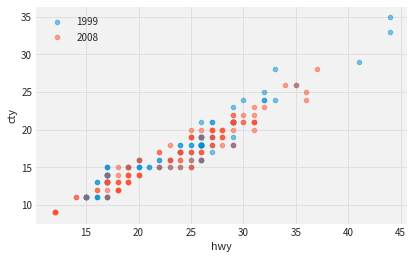

In [3]:
# Basic version
fig, ax = plt.subplots()
colors = sns.color_palette()
df_1999 = df[df['year'] == 1999]
df_1999.plot.scatter(x="hwy", y="cty", color=colors[0], ax=ax, alpha=0.5, label="1999")
df_2008 = df[df['year'] == 2008]
df_2008.plot.scatter(x="hwy", y="cty", color=colors[1], ax=ax, alpha=0.5, label="2008");

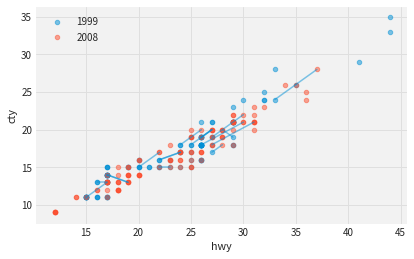

In [4]:
def connect_shared(ax):
    for name, mdf in df.groupby(['model', 'trans', 'displ', 'cyl', 'fl']):
        if len(pd.unique(mdf['year'])) < 2:
            continue
        for idx1999, idx2008 in zip(mdf.loc[mdf['year'] == 1999].index, mdf.loc[mdf['year'] == 2008].index):
            x = [mdf.loc[idx1999, 'hwy'], mdf.loc[idx2008, 'hwy']]
            y = [mdf.loc[idx1999, 'cty'], mdf.loc[idx2008, 'cty']]
            ax.plot(x, y, color=colors[0], alpha=0.5)
            
fig, ax = plt.subplots()
colors = sns.color_palette()
df_1999 = df[df['year'] == 1999]
df_1999.plot.scatter(x="hwy", y="cty", color=colors[0], ax=ax, alpha=0.5, label="1999")
df_2008 = df[df['year'] == 2008]
df_2008.plot.scatter(x="hwy", y="cty", color=colors[1], ax=ax, alpha=0.5, label="2008")
connect_shared(ax)
# fig.savefig("scatter.pdf")

## Version 3: x -> year, y -> cty/hwy

An alternate with city mileage on the x axis, highway milage on the y axis, and use color for year.

We know that the best visual variable for carrying out quantitative tasks is position. Let us do another version of the visualization mapping year to position.

In [5]:
multiple = []
for name, mdf in df.groupby(['model', 'trans', 'displ', 'cyl', 'fl']):
    if len(pd.unique(mdf['year'])) > 1:
        multiple.append(name)
print(len(multiple), "cars in multiple years of total", len(pd.unique(df['model'])))
print(len(pd.unique(df['manufacturer'])), "manufacturers")

18 cars in multiple years of total 38
15 manufacturers


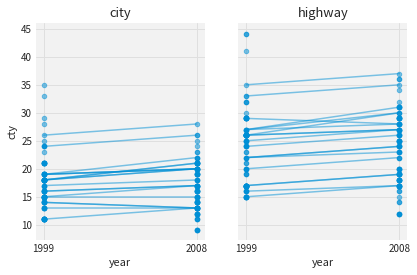

In [5]:
def lines_for_shared(ax, var):
    for name, mdf in df.groupby(['model', 'trans', 'displ', 'cyl', 'fl']):
        if len(pd.unique(mdf['year'])) < 2:
            continue
        for val1999, val2008 in zip(mdf.loc[mdf['year'] == 1999, var], mdf.loc[mdf['year'] == 2008, var]):
            x = [1999, 2008]
            y = [val1999, val2008]
            ax.plot(x, y, color=colors[0], alpha=0.5)
fig, axs = plt.subplots(1, 2, sharey=True)
ax=axs[0]
ax.set_title("city")
df.plot.scatter(x='year', y='cty', alpha=0.5, color=colors[0], ax=ax)
lines_for_shared(ax, 'cty')
ax.set_xticks([1999, 2008]);
ax=axs[1]
ax.set_title("highway")
df.plot.scatter(x='year', y='hwy', alpha=0.5, color=colors[0], ax=ax)
lines_for_shared(ax, 'hwy')
ax.set_xticks([1999, 2008]);
# fig.savefig("slope.pdf")

# Color

Working with color can be tricky. Poor choice of color palette can render an otherwise good visualization completely useless.

## Respect the data

<div style="display: flex; flex-direction: row;  justify-content: space-around">

<div style="width: 300px">
  <img alt="jet-spread" src="images/jet-spread.png" />
</div>
</div>

Remember, visual inferences should be valid data interfences.

Here is the plot from earlier again. What do you think the data looks like? Are there bands of similar values?

## Visual inferences should be valid data inferences

<div style="display: flex; flex-direction: row;  justify-content: space-around">

<div style="width: 300px">
  <img alt="jet-spread" src="images/jet-spread.png" />
</div>
<div>
    &nbsp;
</div>
<div style="width: 300px">
  <img alt="jet-spread" src="images/gray-spread.png" />
</div>
</div>

Here is the same data shown using a grayscale colormap on the right.

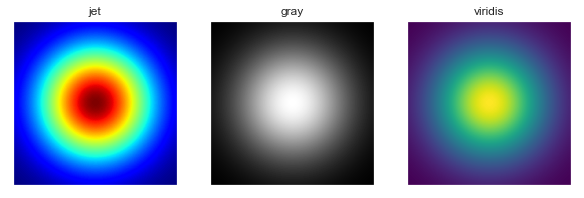

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

def get_image():
    delta = 0.0025
    x = y = np.arange(-1.5, 1.5, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-X**2 - Y**2)
    return Z

cmaps = ['jet', 'gray', 'viridis']
fix, axs = plt.subplots(1, len(cmaps), figsize=(10, 10))
for ax, cmap in zip(axs, cmaps):
    ax.imshow(get_image(), cmap=cmap)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(cmap)

The choice of color palette can greatly influence how the data are interpreted. Jet and rainbow are terrible colormaps for visualization. Grayscale is a safe choice, but might be too visually bland. There are palettes like viridis that are less stark than grayscale, but still designed to be interpretable.

# Kinds of palettes

* **Qualitative** for categorical data
* **Diverging** for numerical data with a clear central point
* **Sequential** for numerical data otherwise


qualitative


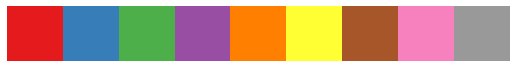

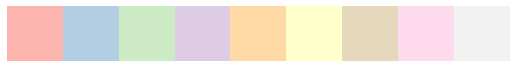

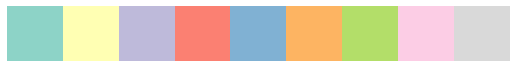

In [21]:
%matplotlib inline
import seaborn as sns

print("qualitative")
sns.palplot(sns.color_palette('Set1', 9))
sns.palplot(sns.color_palette('Pastel1', 9))
sns.palplot(sns.color_palette('Set3', 9))

diverging


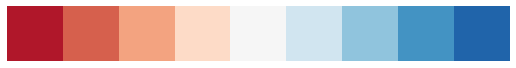

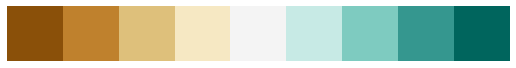

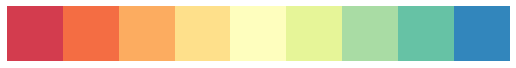

In [23]:
%matplotlib inline
import seaborn as sns

print("diverging")
sns.palplot(sns.color_palette('RdBu', 9))
sns.palplot(sns.color_palette('BrBG', 9))
sns.palplot(sns.color_palette('Spectral', 9))

sequential


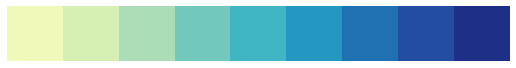

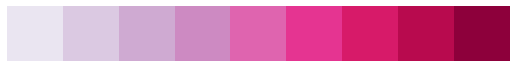

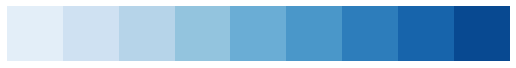

In [22]:
%matplotlib inline
import seaborn as sns

print("sequential")
sns.palplot(sns.color_palette('YlGnBu', 9))
sns.palplot(sns.color_palette('PuRd', 9))
sns.palplot(sns.color_palette('Blues', 9))

# Advice

- Use a carefully designed palette (e.g., [Colorbrewer](http://colorbrewer2.org))
- Tufte: Above all do no harm

# Transformations

Sometimes it might be necessary to transform data as part of the mapping step because the visualization or the data require it to produce an interpretable result.

# Wide Dynamic Range

One such case is data with a wide dynamic range. For example, consider this bar chart of the minimum inhibitory concentration of penicillin for a variety of species of bacteria.

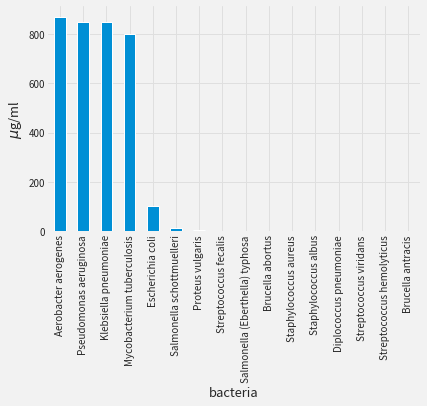

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
if 'ciyer' in mpl.style.available:
    plt.style.use(['seaborn-darkgrid', 'ciyer'])

df = pd.read_json('data/burtin.json', orient='records').set_index("bacteria")
ser = df['penicillin'].sort_values(ascending=False)
ax = ser.plot.bar()
ax.set_ylabel('$\mu$g/ml');
# ax.get_figure().savefig("antibiotics-nolog.pdf", bbox_inches='tight')

# Wide Dynamic Range

It looks like many bacteria have a mic of 0, but that, of course, makes no sense. By adding a log transform, we can better see the full range of data. We lose some resolution in the high end of the data, but it doesn't matter if the MIC is 800 or 820 $\mu g/ml$. It is more important that we see the differences in the lower end of the range. A dose of 0.001 is quite different from 1.

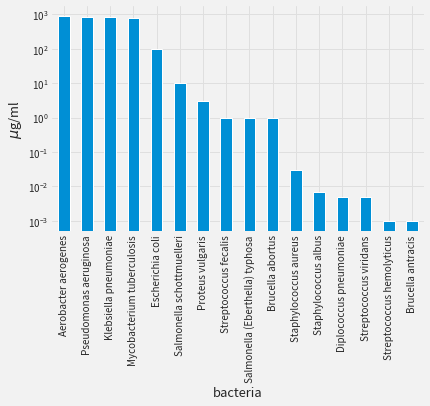

In [8]:
ser = df['penicillin'].sort_values(ascending=False)
ax = ser.plot.bar(logy=True)
ax.set_ylabel('$\mu$g/ml');
# ax.get_figure().savefig("antibiotics.pdf", bbox_inches='tight')

# X-Form Tour de Force

In 1951, Will Burtin published this famous visualization which applies several transformations to make an engaging visualization of antibiotic efficacy. In addition to a log transformation of the MIC, Burtin inverts the scale, so that more effective antibiotics are more prominent, and wraps the bar chart around a circle.

![Burtin](http://graphics8.nytimes.com/images/2008/06/01/books/heller-1.jpg)

# Example: deviation from a reference

Another useful transformation is to transform data to deviation from a reference value. We will apply this transformation to the fuel efficiency data for cars of the same model. We will set the reference to the fuel efficiency in 1999. By transforming this way, we can see changes more clearly.

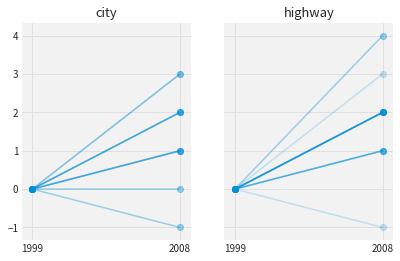

In [6]:
keys = ['model', 'trans', 'displ', 'cyl', 'fl']
def diff_frame(var):
    result = []
    for name, mdf in df.groupby(keys):
        if len(pd.unique(mdf['year'])) < 2:
            continue
        for val1999, val2008 in zip(mdf.loc[mdf['year'] == 1999, var], mdf.loc[mdf['year'] == 2008, var]):
            elt = {k:mdf.iloc[0][k] for k in keys}
            elt['start'] = 0
            elt['end'] = val2008 - val1999
            result.append(elt)
    return pd.DataFrame(result)



def plot_diff(ax, var):
    diff_df = diff_frame(var)
    for i, row in diff_df.iterrows():
        val1999 = row['start']
        val2008 = row['end']
        ax.scatter(1999, val1999, color=colors[0], alpha=0.2)
        ax.scatter(2008, val2008, color=colors[0], alpha=0.2)
        x = [1999, 2008]
        y = [val1999, val2008]
        ax.plot(x, y, color=colors[0], alpha=0.2)
fig, axs = plt.subplots(1, 2, sharey=True)
ax=axs[0]
ax.set_title("city")
plot_diff(ax, 'cty')
ax.set_xticks([1999, 2008]);
ax=axs[1]
ax.set_title("highway")
plot_diff(ax, 'hwy')
ax.set_xticks([1999, 2008]);
# fig.savefig("transform-abs.pdf")

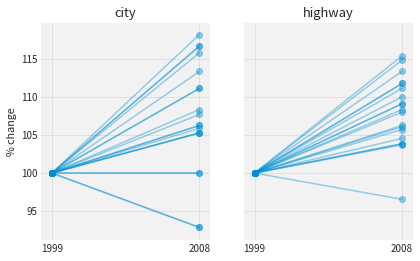

In [7]:
keys = ['model', 'trans', 'displ', 'cyl', 'fl']
def pct_frame(var):
    result = []
    for name, mdf in df.groupby(keys):
        if len(pd.unique(mdf['year'])) < 2:
            continue
        for val1999, val2008 in zip(mdf.loc[mdf['year'] == 1999, var], mdf.loc[mdf['year'] == 2008, var]):
            elt = {k:mdf.iloc[0][k] for k in keys}
            elt['start'] = 100
            elt['end'] = (val2008 / val1999) * 100
            result.append(elt)
    return pd.DataFrame(result)


def plot_pct_diff(ax, var):
    diff_df = pct_frame(var)
    for i, row in diff_df.iterrows():
        val1999 = row['start']
        val2008 = row['end']
        ax.scatter(1999, val1999, color=colors[0], alpha=0.4)
        ax.scatter(2008, val2008, color=colors[0], alpha=0.4)
        x = [1999, 2008]
        y = [val1999, val2008]
        ax.plot(x, y, color=colors[0], alpha=0.4)
fig, axs = plt.subplots(1, 2, sharey=True)
ax=axs[0]
ax.set_title("city")
plot_pct_diff(ax, 'cty')
ax.set_xticks([1999, 2008]);
ax.set_ylabel("% change")
ax=axs[1]
ax.set_title("highway")
plot_pct_diff(ax, 'hwy')
ax.set_xticks([1999, 2008]);
# fig.savefig("transform-pct.pdf")

# Part II Teaser

<div style="display: flex; flex-wrap: wrap">
    <div style="padding-right: 5px">
        <img width="300px" src="https://miro.medium.com/max/2572/0*pHbwlQsQ2tMY-6oe.png" alt="small multiples" />
        <div style="font-size: smaller"><a href="https://medium.com/@cramakrishnan/the-delong-shiller-redux-dc9dd21eefd1">Medium: DeLong / Shiller Redux</a></div>
    </div>
    <div style="padding-right: 5px">
        <img width="221px" src="https://fivethirtyeight.com/wp-content/uploads/2015/12/morris-stephcurry-1.png?w=1150" alt="scatter and lines" />
        <div style="font-size: smaller"><a href="http://fivethirtyeight.com/features/stephen-curry-is-the-revolution/">Fivethirtyeight: Stephen Curry</a></div>  
    </div>
    <div style="padding-right: 5px">
        <img width="221px" src="https://fivethirtyeight.com/wp-content/uploads/2015/12/morris-stephcurry-21.png?w=1150" alt="scatter and lines" />
        <div style="font-size: smaller"><a href="http://fivethirtyeight.com/features/stephen-curry-is-the-revolution/">Fivethirtyeight: Stephen Curry</a></div>  
    </div>    
    <div>
        <img width="319px" src="https://image.businessinsider.com/56b00a83c08a80e3098bdd74?width=1200&format=jpeg&auto=webp" alt="shading" />
        <div style="font-size: smaller">
            <a href="http://uk.businessinsider.com/recession-calls-following-financial-crisis-2016-2?r=US&IR=T">Business Insider</a> / <a href="http://myf.red/g/3jN5">FRED</a>
        </div>
    </div>
</div>


Pt 2. covers using multi-dimensional data, layering, context, small multiples to make visualizations like the above.

* Tufte's rules
* The importance of context
* Layering information
* Ordering information